<a href="https://colab.research.google.com/github/ValdazoAmerico/seguros-medicos-machine-learning/blob/main/Venta_de_seguros_m%C3%A9dicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

Text(0.5, 1.0, 'Distribution of Charges')

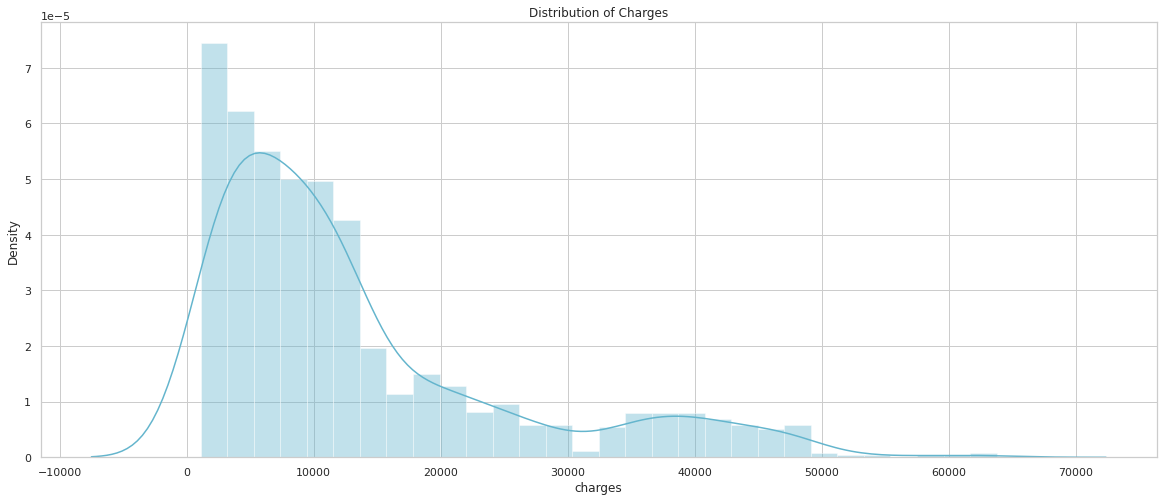

In [ ]:
sns.set(style="whitegrid")
f, ax = plt.subplots(1, 1, figsize=(20, 8))
ax = sns.distplot(df['charges'], kde=True, color='c')
plt.title('Distribution of Charges')

In [ ]:
##Conversión de variables categoricas en etiquetas

df[['sex','smoker','region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

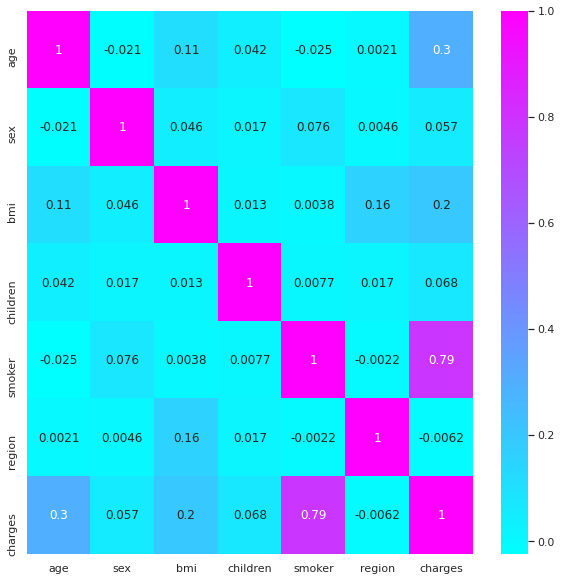

In [ ]:
f, ax = plt.subplots(1,1, figsize=(10,10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

## Regresión Lineal

In [ ]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['charges'], axis=1)
y = df['charges']
x_train,x_test,y_train,y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
reg_lineal=Lin_reg.fit(x_train,y_train)
print('Intercepto: %.3f' % Lin_reg.intercept_)
print(Lin_reg.coef_)
print('score: %.3f' % Lin_reg.score(x_test,y_test))

Intercepto: -11661.984
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
score: 0.800


In [ ]:
y_pred_lineal = reg_lineal.predict(x_test)
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, r2_score

print("Mean absolute Error:", metrics.mean_absolute_error(y_test,y_pred_lineal))
print("Mean squared Error:", metrics.mean_squared_error(y_test,y_pred_lineal))
print("Root mean squared error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred_lineal)))
##Coefficient of determination: 1 es predicción perfecta
print('Coefficient of determination: %.2f' % r2_score(y_test,y_pred_lineal)) 

Mean absolute Error: 3930.333273901141
Mean squared Error: 31845929.13415943
Root mean squared error: 5643.219748880902
Coefficient of determination: 0.80


# Regresión Ridge 

In [ ]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
model_ridge=Ridge.fit(x_train,y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test,y_test))

-11643.440927495829
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
0.7996989632063141


In [ ]:
y_pred_ridge=model_ridge.predict(x_test)
print("Mean absolute Error:", metrics.mean_absolute_error(y_test,y_pred_ridge))
print("Mean squared Error:", metrics.mean_squared_error(y_test,y_pred_ridge))
print("Root mean squared error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred_ridge)))
##Coefficient of determination: 1 es predicción perfecta
print('Coefficient of determination: %.2f' % r2_score(y_test,y_pred_ridge)) 

Mean absolute Error: 3936.6450777641576
Mean squared Error: 31873896.43806194
Root mean squared error: 5645.697161384229
Coefficient of determination: 0.80


# Regresión Lasso

In [ ]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
model_lasso=Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-11661.838929039533
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
0.7998690236224706


In [ ]:
y_pred_lasso = model_lasso.predict(x_test)

print("Mean absolute Error:", metrics.mean_absolute_error(y_test,y_pred_lasso))
print("Mean squared Error:", metrics.mean_squared_error(y_test,y_pred_lasso))
print("Root mean squared error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred_lasso)))
##Coefficient of determination: 1 es predicción perfecta
print('Coefficient of determination: %.2f' % r2_score(y_test,y_pred_lasso)) 


Mean absolute Error: 3930.478756589608
Mean squared Error: 31846834.730446476
Root mean squared error: 5643.299985863456
Coefficient of determination: 0.80


## Random Forest para Regresión

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100, criterion = 'mse',
          random_state=1,
          n_jobs=-1)
model_rfr=Rfr.fit(x_train,y_train)
x_train_pred=Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %3f' %
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('MSE train data: %.3f, R2 test data: %3f' %
      (metrics.r2_score(y_train,x_train_pred, y_train),
       metrics.r2_score(y_test,x_test_pred, y_test)))

MSE train data: 3630549.354, MSE test data: 19737210.131598
MSE train data: 0.971, R2 test data: 0.876759


In [ ]:
y_pred_rfr = model_rfr.predict(x_test)
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

print("Mear Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_rfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfr))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))



Mear Absolute Error: 2644.4281321816666
Mean Squared Error: 19737210.131598476
Root Mean Squared Error:  4442.658002997583


Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218751)
3.age(0.136942)
4.children(0.021042)
5.region(0.015209)
6.sex(0.006377)


<BarContainer object of 6 artists>

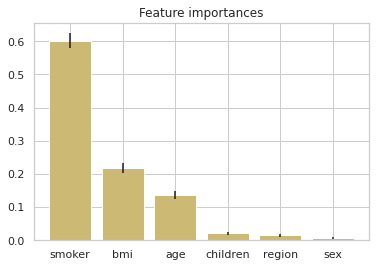

In [ ]:
print("Feature importance ranking\n\n")
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age','sex','bmi','children','smoker','region']
importance_list = []
for f in range(x.shape[1]):
  variable = variables[indices[f]]
  importance_list.append(variable)
  print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices], color="y", yerr=std[indices], align="center")